# Project description

As an employee of the online store "Streamline," your main objective is to identify the key factors that determine a game's success using historical data on game sales, user and expert ratings, genres, and platforms (such as Xbox or PlayStation) available from open sources. This will allow you to make an informed decision on potentially popular products and plan effective advertising campaigns.

Your data currently extends up to 2016, and assuming it's December 2016, you need to develop a consistent data processing approach for forecasting sales. Whether you forecast for 2017 based on 2016 data or for 2027 based on 2026 data, the approach should be the same.

One significant abbreviation found in the dataset is ESRB (Entertainment Software Rating Board), an association responsible for determining the age rating of computer games. ESRB evaluates game content and assigns it an appropriate age category, such as "Mature," "Early Childhood," or "Teen."

# Table of contents

---

1. [Data overview](#data-overview)
    * [Conclusion](#overview-conclusion)
2. [Data preparation](#data-preparation)
    * [Conclusion](#preparation-conclusion)
3. [Exploratory data analysis](#eda)
    * [Conclusion](#eda-conclusion)
4. [User portrait for each region](#portrait)
    * [Conclusion](#portrait-conclusion)
5. [Hypothesis testing](#hypothesis)
    * [Hypothesis #1](#hypothesis-1)
    * [Hypothesis #2](#hypothesis-2)
6. [General conclusion](#conclusion)

---

## Data overview <a class="anchor" id="data-overview"></a>

**Importing libraries, reading data**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from scipy import stats as st

In [2]:
"""
Checking for CSV located in:
    - Absolute path
    - Relative path to the file in the same directory
    - Windows-style path with a raw string (r) prefix
"""
try:
    df = pd.read_csv("/datasets/games.csv")
except FileNotFoundError:
    try:
        df = pd.read_csv("games.csv")
    except FileNotFoundError:
        try:
            df = pd.read_csv(r"games.csv")
        except FileNotFoundError:
            print("File not found")

# Ignorig all warnings and displaying all columns in the DF:
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

# Settings for plots:
sns.set(
    rc = {"figure.figsize":(14,5)},
    color_codes=True   
)
pal = sns.color_palette("tab10", 50)

display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Data description**

- `Name`: name of the game
- `Platform`: platform
- `Year_of_Release`: year of release
- `Genre`: game genre
- `NA_sales`: sales in North America (millions of copies sold)
- `EU_sales`: sales in Europe (millions of copies sold)
- `JP_sales`: sales in Japan (millions of copies sold)
- `Other_sales`: sales in other countries (millions of copies sold)
- `Critic_Score`: critic score (maximum 100)
- `User_Score`: user score (maximum 10)
- `Rating`: rating from the Entertainment Software Rating Board (ESRB). This association determines the rating of computer games and assigns them an appropriate age category.

### Conclusion <a class="anchor" id="overview-conclusion"></a>

What needs to be done:

- Rename the columns;
- Convert the release date to an integer format;
- Convert numerical data to the correct formats;
- Handle missing values in columns with rating scores.

## Data preparation <a class="anchor" id="data-preparation"></a>

**Column renaming**

Rename the columns (convert to lowercase).

In [3]:
df.columns = df.columns.str.lower()

**Handling missing values**

In [4]:
df.isna().mean() * 100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

Missing values in game titles (and genre) will be removed.

In [5]:
df[df["name"].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
df.dropna(subset = ["name"], inplace=True)

I will delete the number of missing values in the release date.

In [7]:
df.shape

(16713, 11)

In [8]:
df[df["year_of_release"].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
df.dropna(subset = ["year_of_release"], inplace=True)

Missing values in genres were removed along with missing values in game titles.

Now let's move on to ratings from critics, users, and the ESRB rating.

For the critic score, it appears to be a 100-point system without decimal points (which will be fixed in the next step). Missing values will be replaced with "-100" as they account for 51% of the column.

In [10]:
df["critic_score"].fillna((-100), inplace=True)

The user score is a 10-point system with decimal points. Missing values will be replaced with "-10" as they account for 40% of the column.

In [11]:
df["user_score"].fillna((-10), inplace=True)
df["user_score"] = df["user_score"].replace(["tbd"],-5)

The value "TBD" (To Be Determined) in the user score indicates that the rating for the game was not fully formed at the time of data collection, such as not having enough ratings. These will be replaced with "-5".

In [12]:
df["user_score"].value_counts()

-10    6605
-5     2376
7.8     322
8       285
8.2     276
       ... 
0.7       2
1.1       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 97, dtype: int64

The rating column indicates the age category of the game and has 40% missing values. There is no need to replace these values as only the ESRB organization is authorized to assign a rating to a game.

In [13]:
df["rating"].fillna(("No rating"), inplace=True)

The ratings are as follows:

- "EC" (Early Childhood) - "For young children"
- "E" (Everyone) - "For everyone" (including "K-A" ("Kids to Adults"))
- "E10+" (Everyone 10 and older) - "For everyone 10 and older"
- "T" (Teen) - "For teenagers"
- "M" (Mature) - "For adults"
- "AO" (Adults Only 18+) - "For adults only"
- "RP" (Rating Pending) - "Rating pending"

**Data transformation:**

In [14]:
# Release date:
df["year_of_release"] = df["year_of_release"].astype("Int64")

# Critic scores:
df["critic_score"] = df["critic_score"].astype("int")

# User scores:
df["user_score"] = df["user_score"].astype("float")

**Calculation of total sales**

In [15]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

# Reordering:
df = df[[
    "name", "platform", "year_of_release", "genre", "na_sales", "eu_sales",
    "jp_sales", "other_sales", "total_sales", "critic_score", "user_score", "rating"
]]

### Conclusion <a class="anchor" id="preparation-conclusion"></a>

1. The data was transformed to the required types.
2. The following columns were changed and for the following reasons:
    - All column names were transformed to lowercase as per the task instructions.
    - Missing values in game names might have been due to human error, with only two such values present. These were removed from the dataframe.
    - Missing values in game release dates were removed, with only 1.6% of the data containing missing values.
    - Missing values in game genres might have been due to human error, with only two such values present. These were removed from the dataframe.
    - Missing values in critic scores constituted 51% of the data and were replaced with a placeholder value.
    - Missing values in user scores constituted 40% of the data and were replaced with a placeholder value.
    - Missing values in ESRB ratings constituted 40% of the data and required no changes since the ratings are assigned by an organization.

3. During the data transformation, the following changes were made:
    - Release dates were converted to integer values representing the year.
    - Critic scores were converted to integer values with a range of 0 to 100 and no decimal places, which was the original range of the data.
    - User scores were converted to float values with a range of 0 to 10 and one decimal place, which was the original range of the data.
4. In order to calculate the total sales, the data from the four regions was combined and added to a new column called `total_sales`.

## Exploratory data analysis <a class="anchor" id="eda"></a>

***Task #1***

> First, let's take a look at how many games were released in different years. Are the data for all periods important?

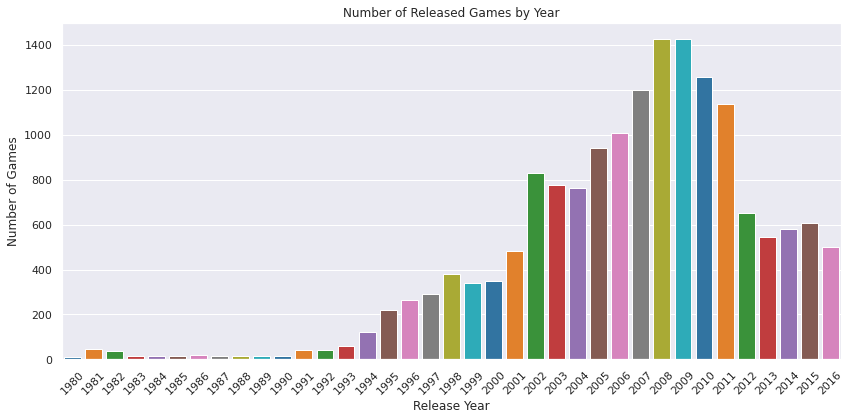

In [16]:
# Group by year and plot graph
df_years = df.groupby("year_of_release")["name"].count().reset_index()
df_years = df_years.rename(columns={
    "year_of_release": "years",
    "name": "games"
})

plt.figure(figsize=(12, 6))
sns.barplot(data=df_years, x="years", y="games", palette=pal)

plt.title("Number of Released Games by Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Games")

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Before 1994, the gaming industry was not as popular, which is supported by the fact that in 1994, Sony introduced its new development - the PlayStation console.

In [17]:
df_years.sort_values(by="games", ascending=False).head()

,years,games
28,2008,1427
29,2009,1426
30,2010,1255
27,2007,1197
31,2011,1136


***Task #2***

> Look at how sales have changed across platforms. Choose platforms with the highest total sales and plot the distribution by year. Over what characteristic period do new platforms appear and old ones disappear? Take data from the corresponding current period. Determine the current period independently as a result of the study of previous questions. The main factor is that this data will help make a forecast for 2017. Do not consider data from previous years. Which platforms are leading in sales, growing or declining? Choose several potentially profitable platforms.

**Popular platforms and their EOL**

In [18]:
# Top 10 most popular platforms pivot:
df_platforms = df.pivot_table(
    index="platform",
    values="total_sales",
    aggfunc=sum
).sort_values("total_sales", ascending=False).head(10)
df_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [19]:
top_platforms_list = df_platforms.index[:10].tolist()
top_platforms_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [20]:
# Sales of the top 10 platforms for the period 1994-2005 pivot:
top_platforms_2005 = df.query(
    "platform in @top_platforms_list & year_of_release > 1993 and year_of_release < 2006"
).pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

In [21]:
# Sales of the top 10 platforms for the period 2006-2016 pivot:
top_platforms_2016 = df.query(
    "platform in @top_platforms_list & year_of_release > 2005"
).pivot_table(
    index="year_of_release", columns="platform", values="total_sales", aggfunc="sum"
)

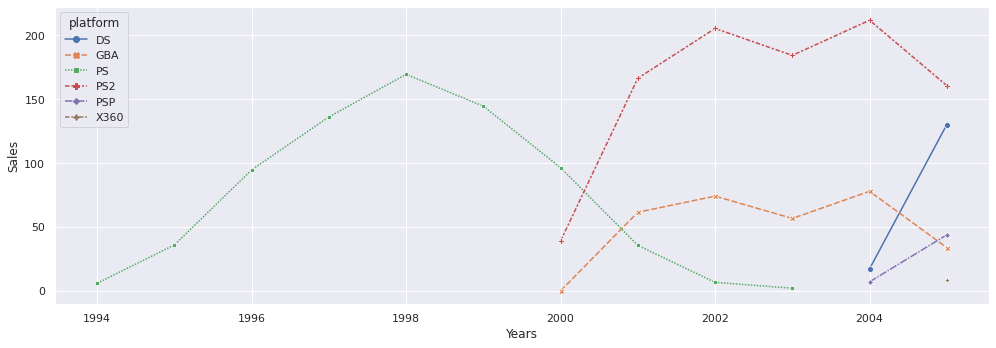

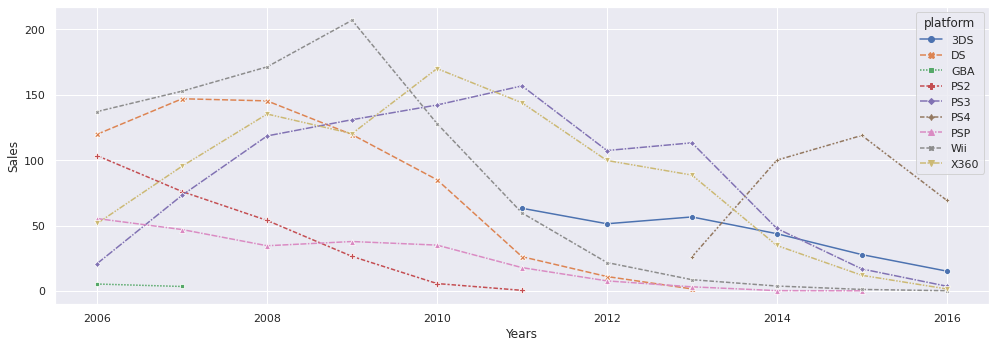

In [22]:
# Plotting the graphs:
sns.lineplot(data=top_platforms_2005, markers=True)
plt.xlabel("Years")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

sns.lineplot(data=top_platforms_2016, markers=True)
plt.xlabel("Years")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

It seems that from 1995-2006 Sony felt on top of the gaming industry until Microsoft with the X360 took over in 2006. The transition between generations PS-PS2-PS3-PS4 happened in a relatively uniform and wave-like manner, about once every 9 years. Let's look at the numbers:

In [23]:
# EOL cycle pivot:
platforms_eol = df.pivot_table(
    index="platform",
    values="year_of_release",
    aggfunc=["min","max"]
)
platforms_eol.columns = ["start", "end"]
platforms_eol["eol"] = platforms_eol["end"] - platforms_eol["start"]

# EOL:
platforms_eol.sort_values("eol", ascending=False).head(10)

,start,end,eol
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10
Wii,2006,2016,10


In [24]:
# Average EOL for each platform:
platforms_eol["eol"].mean().round(1)

7.6

It's a conditional conclusion that the average lifespan of a platform is 7-8 years. There is no absolute connection between the release of a game and the EOL of a platform. Obviously, the support for that platform ends, and therefore its popularity/sales tend to zero.

**Forecast for 2017**

Let's agree that the relevant period starts in 2012 since new generations of platforms were developed and introduced to the market during 2011-2013. Table for sales since 2012.

In [25]:
df_actual = df.query("year_of_release >= 2012")

# Data during the relevant period pivot:
df_actual.pivot_table(
    index="platform",
    values="total_sales",
    aggfunc="sum"
).sort_values("total_sales", ascending=False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


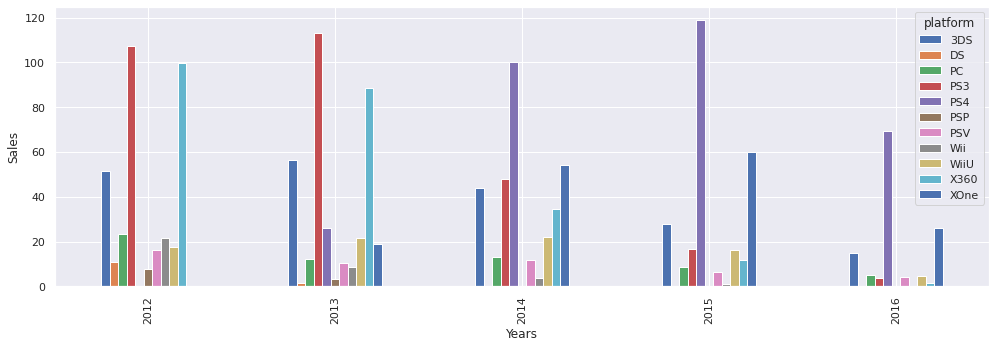

In [26]:
# Pivot for platforms, sales, and years:
df_actual_summary = df_actual.pivot_table(
    index="year_of_release",
    columns="platform",
    values="total_sales",
    aggfunc="sum"
)

# Plotting the graph:
df_actual_summary.plot(grid=True, kind="bar").set(xlabel="Years", ylabel="Sales")
plt.tight_layout()

The following platforms lose popularity during the period 2012-2016: PS3, X360, 3DS. The following platforms are practically lost to the market: DS, Wii, PC, and PSP. Based on this information, it can be assumed that in 2017, PS4 and XOne will still be popular. These platforms are also the most potential in 2017.

***Task #3***

> Plot a boxplot for global game sales broken down by platform. Describe the result.

In [27]:
# Leading platforms:
df_games_top = df_actual.pivot_table(
    index="name",
    columns="platform",
    values="total_sales",
    aggfunc="sum"
)

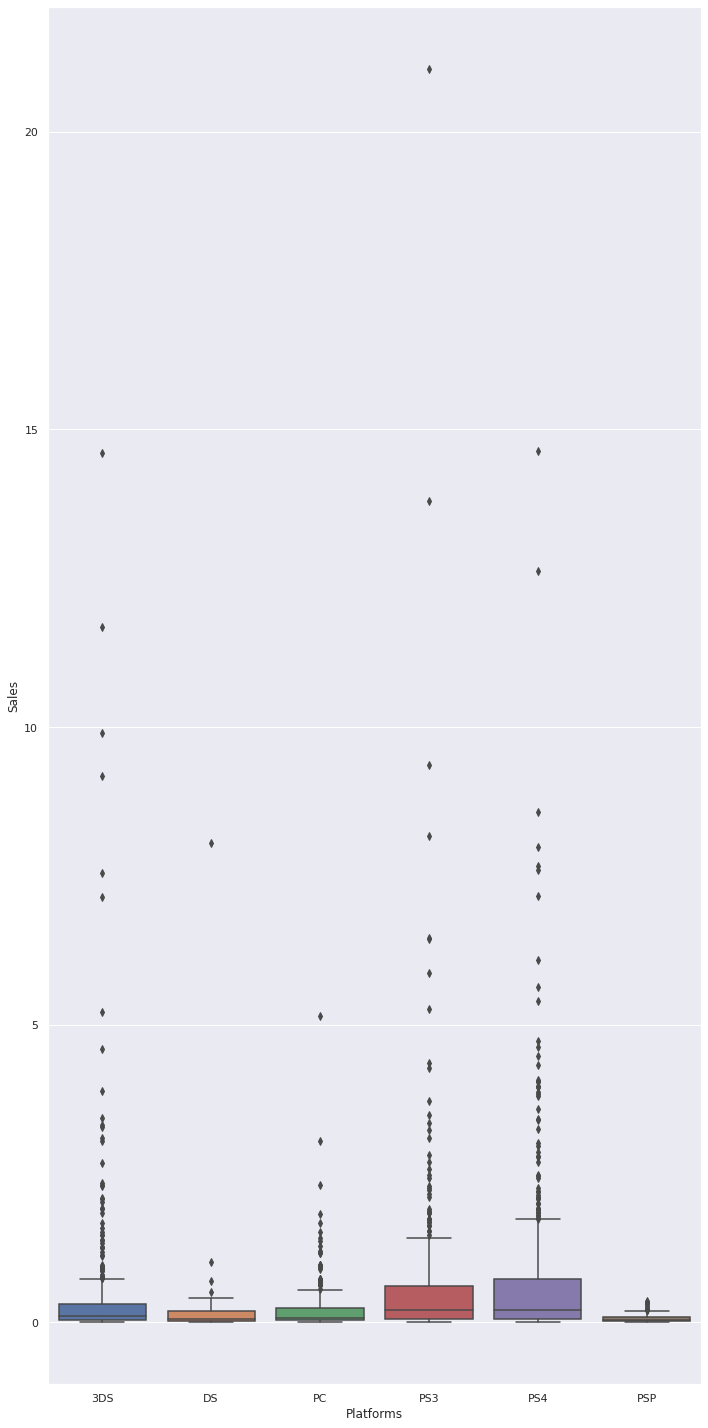

In [28]:
cols_1 = [0, 1, 2, 3, 4, 5]
cols_2 = [6, 7, 8, 9, 10]
df_games_top_1 = df_games_top.drop(df_games_top.columns[cols_2], axis=1)
df_games_top_2 = df_games_top.drop(df_games_top.columns[cols_1], axis=1)

# Settings for boxplot:
sns.set(
    rc = {"figure.figsize":(10, 20)},
    color_codes=True
)
pal = sns.color_palette("tab10", 50)

sns.boxplot(data=df_games_top_1).set(xlabel="Platforms", ylabel="Sales")
plt.tight_layout()

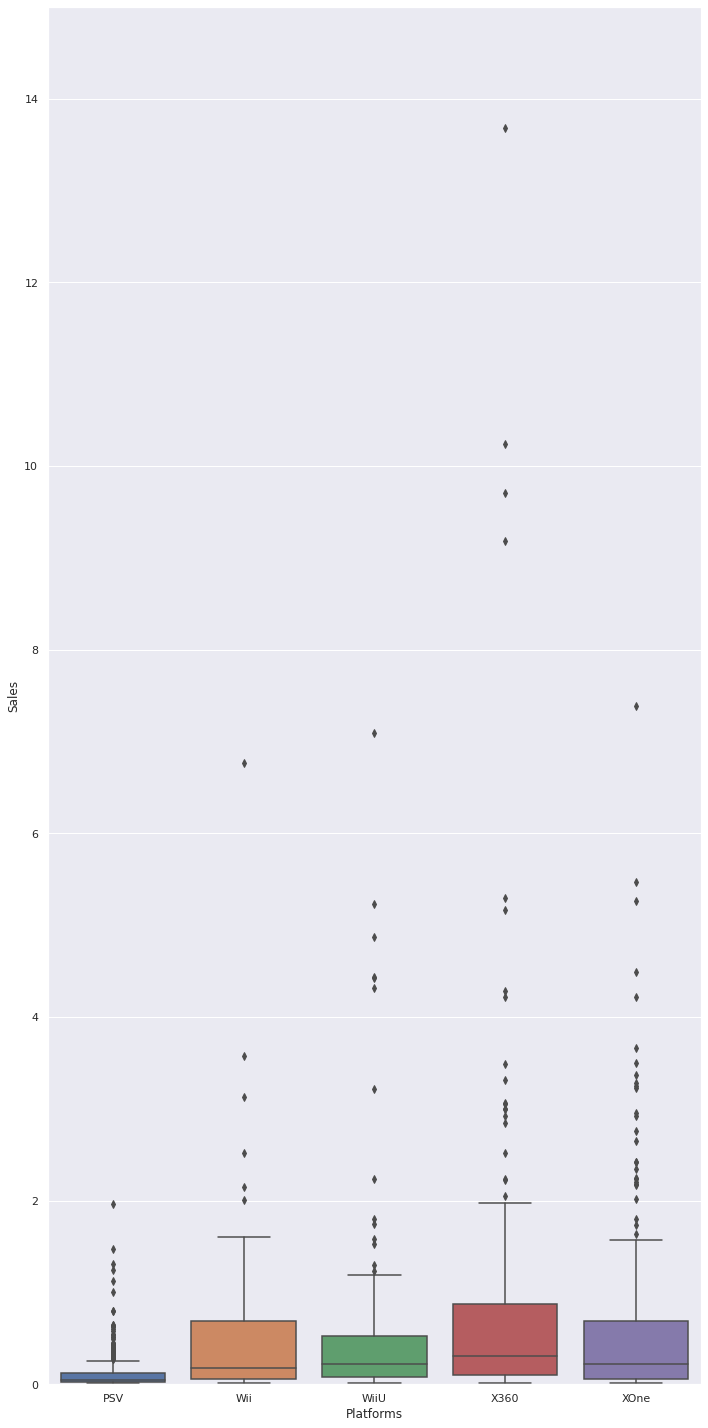

In [29]:
sns.boxplot(data=df_games_top_2).set(xlabel="Platforms", ylabel="Sales")
plt.ylim([0, 15])
plt.tight_layout()

In [30]:
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,-100,-10.0,No rating
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,-100,-10.0,No rating
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83,5.3,M


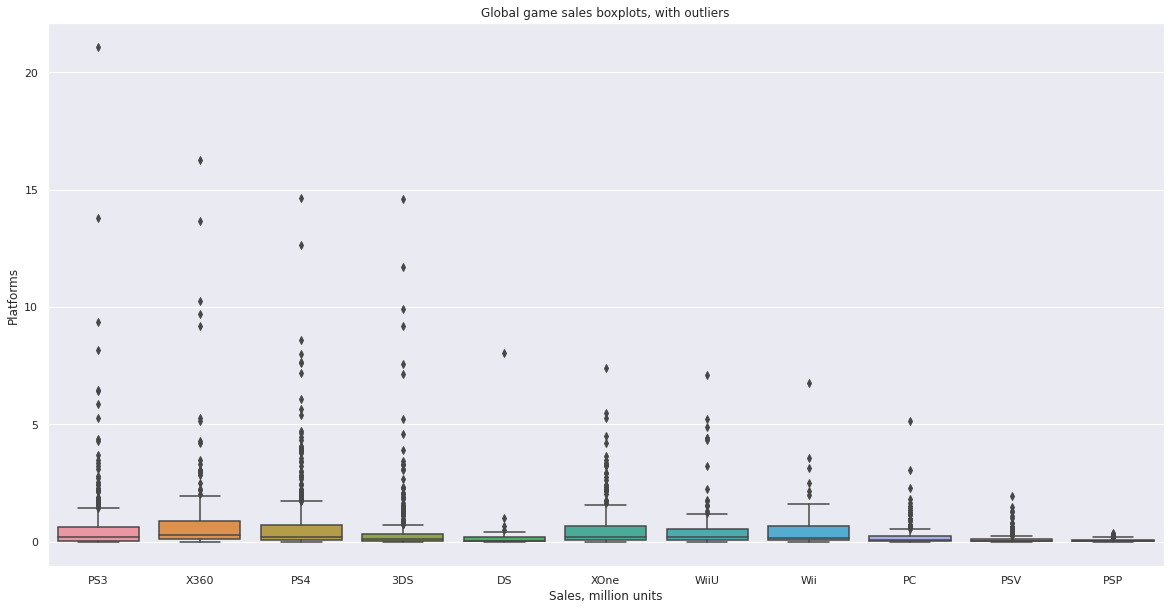

In [31]:
plt.figure(figsize=(20, 10))

sns.boxplot(x="platform", y="total_sales", data=df_actual)

plt.title("Global game sales boxplots, with outliers")
plt.xlabel("Sales, million units")
plt.ylabel("Platforms")

plt.show()

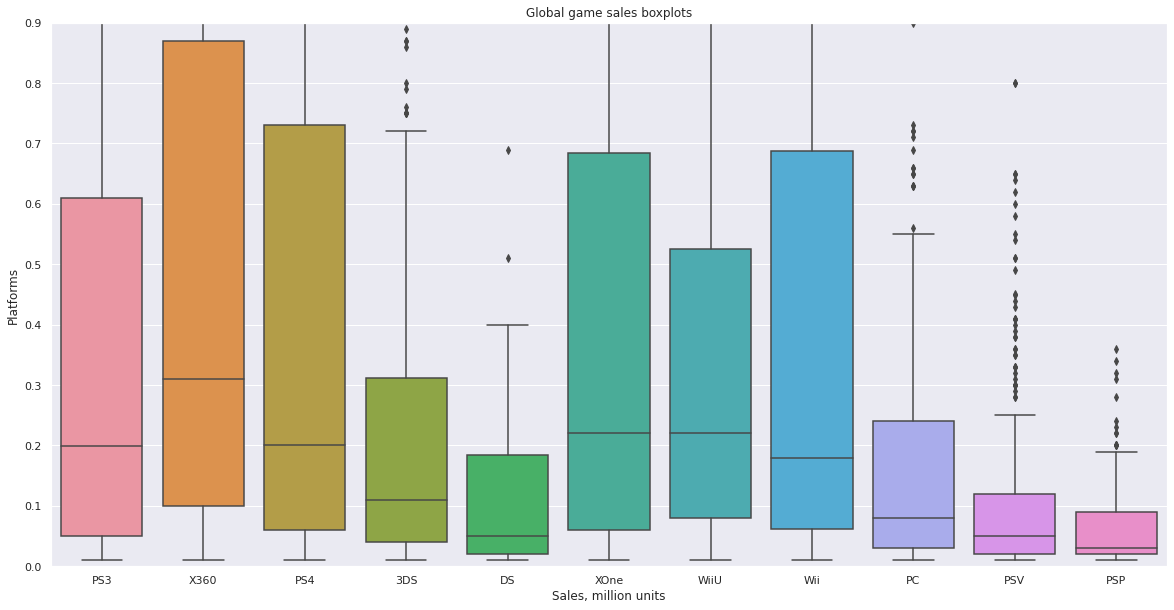

In [32]:
plt.figure(figsize=(20, 10))

sns.boxplot(x="platform",y="total_sales",data=df_actual)

plt.ylim(0, .9)

plt.title("Global game sales boxplots")
plt.xlabel("Sales, million units")
plt.ylabel("Platforms")

plt.show()

The three leading and promising platforms are:

1. PS4 in 2013 replacing PS3
2. XOne in 2013 replacing X360
3. 3DS in 2011 replacing DS

Then came the next generation updates:

4. WiiU (2012) replacing Wii (2006)
5. PSV (2011) replacing PSP (2004)

Other platforms may exceed in absolute sales volume, but they are either obsolete generations or approaching obsolescence (for example X360, or Wii). The most durable and long-lived platform is expectedly PC. But despite the sales volumes of X360, Wii and PS3, it will be the three leading platforms that will consolidate the leadership in the gaming industry in 2017. A summary table will help assess the average sales.

In [33]:
df_actual.pivot_table(
    index="platform",
    values="total_sales",
    aggfunc="mean"
).sort_values(by = "total_sales", ascending = False).head(10)

,total_sales
platform,
X360,0.810068
PS4,0.801378
Wii,0.655000
XOne,0.645020
PS3,0.585781
WiiU,0.559116
3DS,0.491439
DS,0.404839
PC,0.250600


***Task #4***

>Take a look at how user and critic reviews affect sales on a single popular platform. Create a scatter plot and calculate the correlation between reviews and sales. Formulate your conclusions.

For the popular platform, we will take PS4 (X360 is an outdated generation compared to XOne). Here are the pivot tables:

In [34]:
# Critic reviews pivot:
df_ps4_critic_score = df_actual.query(
    "platform in 'PS4' & critic_score > 0"
).pivot_table(
    index="critic_score",
    values="total_sales",
    aggfunc="sum"
).sort_values(by = "total_sales", ascending=False)

df_ps4_critic_score.head(10)

,total_sales
critic_score,
83,23.82
87,18.99
85,18.30
82,18.10
80,15.90
76,13.42
73,13.07
97,12.62
79,9.39


In [35]:
# User reviews pivot:
df_ps4_user_score = df_actual.query(
    "platform in 'PS4' & user_score > 0"
).pivot_table(
    index="user_score",
    values="total_sales",
    aggfunc="sum"
).sort_values(by = "total_sales", ascending=False)

df_ps4_user_score.head(10)

,total_sales
user_score,
5.7,14.09
6.1,13.45
8.3,13.05
6.5,12.73
7.7,12.34
8.1,12.05
7.9,10.92
6.3,10.80
5.0,9.71


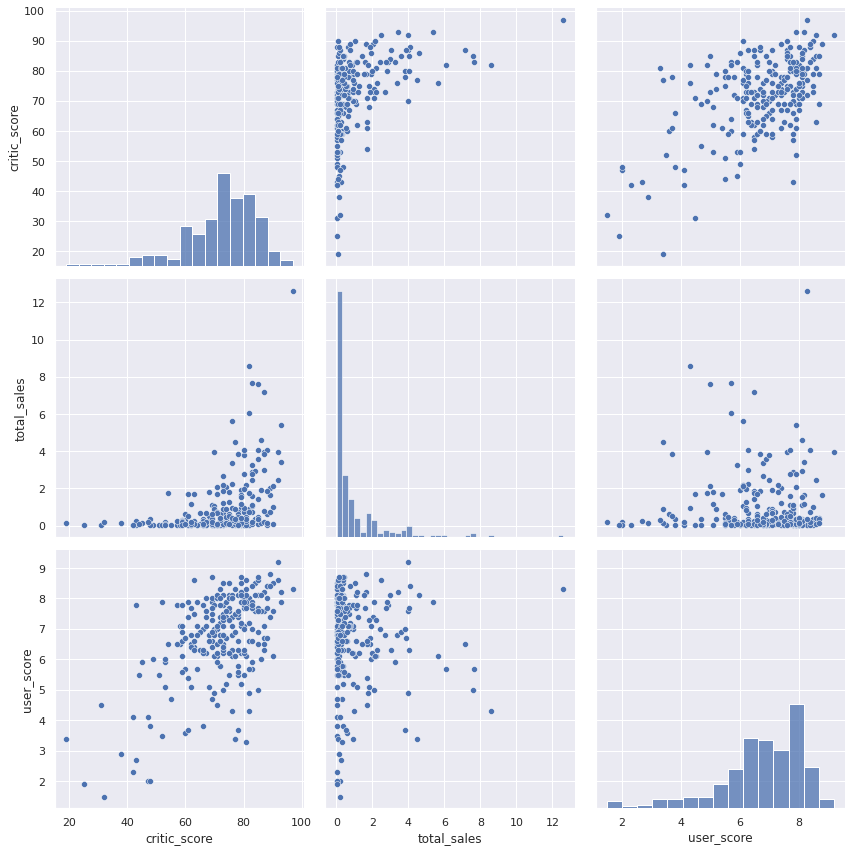

In [36]:
# Scatter plot:
df_ps4_score = df_actual.query(
    "platform in 'PS4' & critic_score > 0 & user_score > 0"
).pivot_table(
    index="name",
    values=["total_sales", "critic_score", "user_score"]
)
sns.pairplot(df_ps4_score, height=4, palette="tab10")
plt.tight_layout()

In [37]:
def review_corr(df, platform, review_type):
    """
    This function takes DF, platform name and type of review
    and return correlation between sales and review scores
    """
    mask = (df["platform"] == platform) & (df[review_type] > 0)
    corr = df_actual[mask]["total_sales"].corr(df[review_type])
    return corr

platforms = ["PS4", "XOne", "3DS"]
review_types = ["critic_score", "user_score"]

# Iterating between combination of platform and review type and printing results:
for platform in platforms:
    for review_type in review_types:
        corr = review_corr(df, platform, review_type)
        print(f"Correlation between {review_type} reviews and {platform} sales: {corr:.2f}")

Correlation between critic_score reviews and PS4 sales: 0.41
Correlation between user_score reviews and PS4 sales: -0.03
Correlation between critic_score reviews and XOne sales: 0.42
Correlation between user_score reviews and XOne sales: -0.07
Correlation between critic_score reviews and 3DS sales: 0.32
Correlation between user_score reviews and 3DS sales: 0.20


**Conclusion**:

There is a direct correlation between critic reviews and high sales within the PS4 platform, while user reviews play almost no role. Similar behavior can be observed for the XOne and 3DS platforms.

***Task #5***

> Look at the overall distribution of games by genre. What can be said about the most profitable genres? Are there genres with high and low sales?


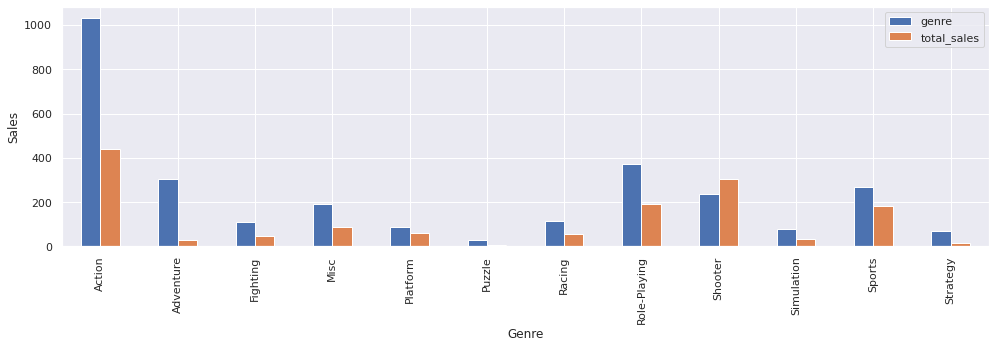

In [38]:
df_games_top_genre = df_actual.pivot_table(
    index="genre",
    values="total_sales",
    aggfunc={"genre":"count", "total_sales":"sum"}
)

# Settings for plots:
sns.set(
    rc = {"figure.figsize":(14,5)},
    color_codes=True   
)
pal = sns.color_palette("tab10", 50)

df_games_top_genre.plot(grid=True, kind="bar").set(xlabel="Genre", ylabel="Sales")
plt.tight_layout()

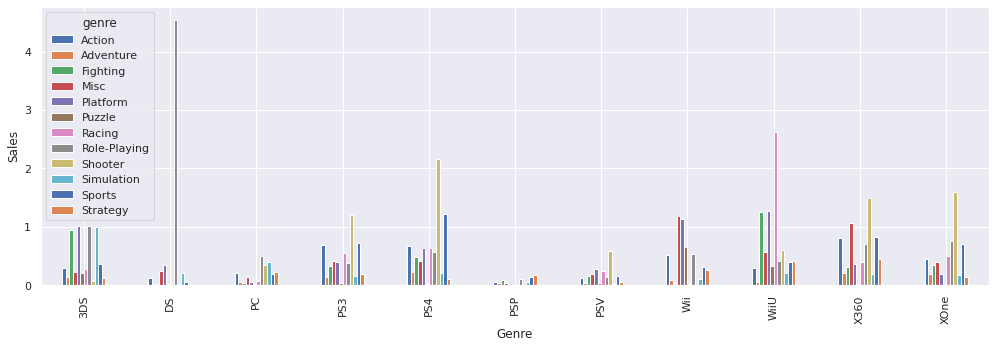

In [39]:
df_games_top_genre_platform = df_actual.pivot_table(
    index="platform",
    columns="genre",
    values="total_sales",
    aggfunc="mean"
)
df_games_top_genre_platform.plot(grid=True, kind="bar").set(xlabel="Genre", ylabel="Sales")
plt.tight_layout()

### Conclusion <a class="anchor" id="eda-conclusion"></a>

1. ***Task #1:*** 
    - During the study, the number of games released in different years was considered. It was determined that before the release of Sony's PlayStation console in 1994, the gaming industry was not as developed and popular. This innovation gave a big boost to the development of the game market.
2. ***Task #2:***
     - In the period of 1994-2006, Sony held a leading position in the gaming industry, but with the arrival of Microsoft's X360 console in 2006, sales began to be divided between them. The Wii platform (at that time possessing innovative technologies) showed strong sales;
     - The change of generations occurs cyclically, and on average, the end-of-life of a platform is 7.5 years. Support for an old platform is discontinued, and as a result, sales noticeably decline;
     - In the period of 2012-2016, PS3, X360, and DS lost popularity. New generations of these consoles, PS4, XOne, and 3DS, replaced the outdated technologies. In 2017, these three platforms have the highest potential;
3. ***Task #3:***
    - Based on global sales by platform, 5 leaders can be identified, all of which are updates of generations:
        1. PS4
        2. XOne
        3. 3DS
        4. WiiU
        5. PSV
    - The most persistent and long-lived platform is the PC, because the PC is always one platform and regardless of the generation of components, it occupies its niche in the game market.
4. ***Task #4:***
    - To determine the relationship between reviews and sales, the PS4 platform was chosen. In the process of the study, the correlation between user ratings and sales was not confirmed, but the ratings of critics have a direct correlation with high sales, with correlation coefficients of -0.03 for user ratings and 0.4 for critic ratings. Additionally, coefficients were found for the XOne and 3DS platforms, and the results were similar to those for the PS4.
5. ***Task #5:*** *What can be said about game genres?*
    - Definitely, the most selling genres are Action, Sports, and Shooter. They also depend heavily on the platform, with the highest sales of these genres on the PS3, PS4, X360, XOne, and 3DS platforms.
    - Adventure, Platform, Simulation, and Strategy sell the worst regardless of the platform.
    - The separate genre Misc (short for miscellaneous) occupies a middle position across almost all platforms, but it is not possible to know exactly what genre it is.
    - Against the backdrop of absolute unpopularity on most platforms, Role-Playing took a leading position on the 3DS platform.

## User portrait for each region <a class="anchor" id="portrait"></a>

> Determine for the user in each region (NA, EU, JP):
> * The most popular platforms (top 5). Describe the differences in sales shares.
> * The most popular genres (top 5). Explain the differences.
> * Does the ESRB rating affect sales in a particular region?

**The most popular platforms (top 5)**

It is already known that globally the leaders in gaming platforms are PS4, XOne, 3DS, WiiU, and PSV. To determine the leaders in local markets, it is necessary to understand which products show which sales.

In [40]:
# Sales by region pivot:
df_pl_sales_regional = df_actual.pivot_table(
    index="platform",
    values=["na_sales","eu_sales","jp_sales"],
    aggfunc="sum"
)
df_pl_sales_regional

,eu_sales,jp_sales,na_sales
platform,,,
3DS,42.64,87.79,55.31
DS,3.53,3.72,4.59
PC,37.76,0.00,19.12
PS3,106.86,35.29,103.38
PS4,141.09,15.96,108.74
PSP,0.42,10.47,0.13
PSV,11.36,21.04,10.98
Wii,11.92,3.39,17.45
WiiU,25.13,13.01,38.10


Now, for individual markets (top 5).

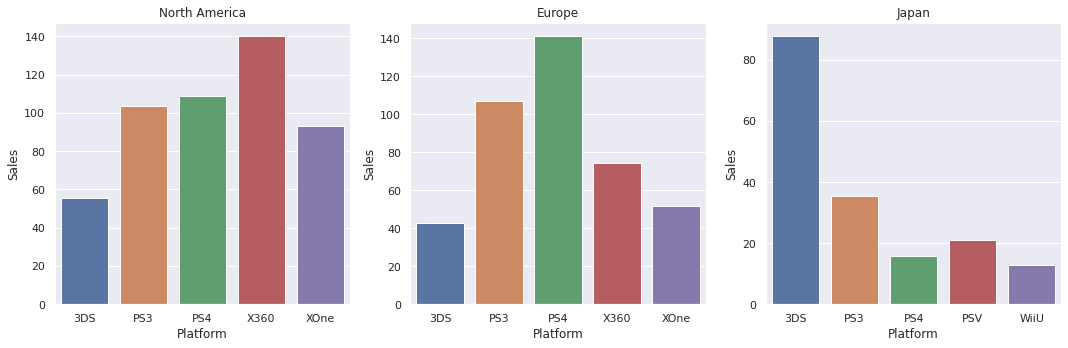

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# North America
pl_sales_na = df_pl_sales_regional.sort_values("na_sales", ascending=False)["na_sales"].head(5)
pl_sales_na.sort_index(inplace=True)
sns.barplot(x=pl_sales_na.index, y=pl_sales_na, ax=axs[0])
axs[0].set_title("North America")
axs[0].set_xlabel("Platform")
axs[0].set_ylabel("Sales")

# Europe
pl_sales_eu = df_pl_sales_regional.sort_values("eu_sales", ascending=False)["eu_sales"].head(5)
pl_sales_eu.sort_index(inplace=True)
sns.barplot(x=pl_sales_eu.index, y=pl_sales_eu, ax=axs[1])
axs[1].set_title("Europe")
axs[1].set_xlabel("Platform")
axs[1].set_ylabel("Sales")

# Japan
pl_sales_jp = df_pl_sales_regional.sort_values("jp_sales", ascending=False)["jp_sales"].head(5)
pl_sales_jp.sort_index(inplace=True)
sns.barplot(x=pl_sales_jp.index, y=pl_sales_jp, ax=axs[2])
axs[2].set_title("Japan")
axs[2].set_xlabel("Platform")
axs[2].set_ylabel("Sales")

plt.tight_layout()

For each market, the overall sales picture looks different (in descending order):
- North America: X360, XOne, PS4, PS3, 3DS
- Europe: PS4, PS3, X360, XOne, 3DS
- Japan: 3DS, PS3, PSV, PS4, WiiU.

**Most popular genres (top 5)**

From the previous section, it is known that the most popular genres are Action, Sports, and Shooter. Let's look at the top 5 genres in terms of global sales.

In [42]:
# Region sales by genre pivot:
df_games_sales_regional = df_actual.pivot_table(
    index="genre",
    values=["na_sales","eu_sales","jp_sales"],
    aggfunc="sum"
)
df_games_sales_regional

,eu_sales,jp_sales,na_sales
genre,,,
Action,159.34,52.80,177.84
Adventure,9.46,8.24,8.92
Fighting,10.79,9.44,19.79
Misc,26.32,12.86,38.19
Platform,21.41,8.63,25.38
Puzzle,1.40,2.14,1.13
Racing,27.29,2.50,17.22
Role-Playing,48.53,65.44,64.00
Shooter,113.47,9.23,144.77


For each market separately (top 5).

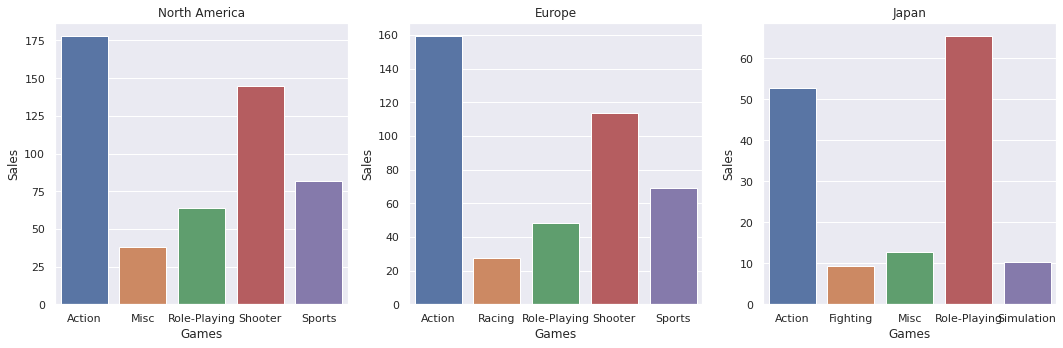

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# North America:
games_na = df_games_sales_regional.sort_values("na_sales", ascending=False)["na_sales"].head(5)
games_na.sort_index(inplace=True)
sns.barplot(x=games_na.index, y=games_na, ax=axs[0])
axs[0].set_title("North America")
axs[0].set_xlabel("Games")
axs[0].set_ylabel("Sales")

# Europe:
games_eu = df_games_sales_regional.sort_values("eu_sales", ascending=False)["eu_sales"].head(5)
games_eu.sort_index(inplace=True)
sns.barplot(x=games_eu.index, y=games_eu, ax=axs[1])
axs[1].set_title("Europe")
axs[1].set_xlabel("Games")
axs[1].set_ylabel("Sales")

# Japan:
games_jp = df_games_sales_regional.sort_values("jp_sales", ascending=False)["jp_sales"].head(5)
games_jp.sort_index(inplace=True)
sns.barplot(x=games_jp.index, y=games_jp, ax=axs[2])
axs[2].set_title("Japan")
axs[2].set_xlabel("Games")
axs[2].set_ylabel("Sales")

plt.tight_layout()


Popularity of genres (in descending order):

- North America: Action, Shooter, Sports, RPG, Misc.
- Europe: Action, Shooter, Sports, RPG, Racing.
- Japan: RPG, Action, Misc, Simulation, Fighting.

Overall, North America and Europe play similar genres, but Japan stands out for its RPG genre. This is due to the extremely high popularity of 3DS in Japan, as this platform was originally developed for role-playing games.

**Rating ESRB and sales**

First, it's necessary to understand which ratings are leading in sales through tables.

In [44]:
# Sales of games in each region pivot:
df_rating_sales_regional = df_actual.pivot_table(
    index="rating",
    values=["na_sales","eu_sales","jp_sales"],
    aggfunc="sum",
    dropna=False
)
df_rating_sales_regional

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,55.37,8.19,75.70
M,193.96,21.20,231.57
No rating,91.50,108.84,103.31
T,52.96,26.02,66.02


In [45]:
df_actual["rating"].value_counts(dropna=False)
df_actual.loc[df["rating"] == "No rating"].sample(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
9232,DmC: Devil May Cry,XOne,2015,Action,0.08,0.04,0.00,0.01,0.13,-100,-10.0,No rating
12590,Toriko: Gourmet Battle!,3DS,2013,Role-Playing,0.00,0.00,0.06,0.00,0.06,-100,-10.0,No rating
16187,Rewrite,PSV,2014,Adventure,0.00,0.00,0.01,0.00,0.01,-100,-10.0,No rating


For each region:

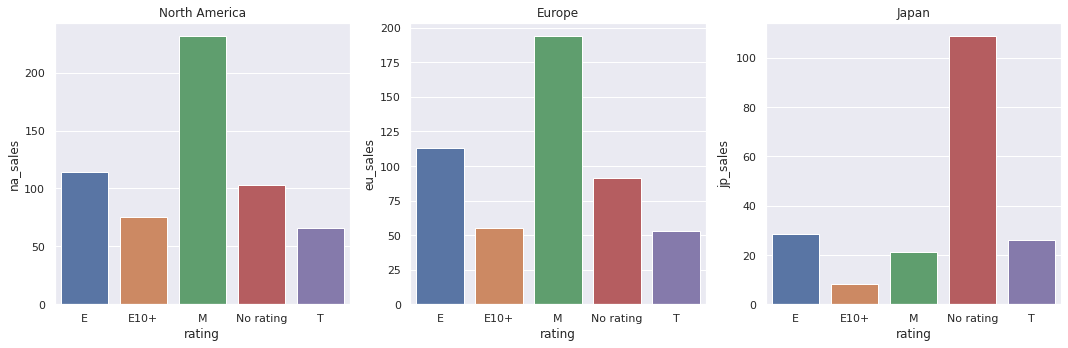

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# North America:
rating_na = df_rating_sales_regional.sort_values("na_sales", ascending=False)["na_sales"].head(5)
rating_na.sort_index(inplace=True)
sns.barplot(x=rating_na.index, y=rating_na, ax=axs[0])
axs[0].set_title('North America')

# Europe:
rating_eu = df_rating_sales_regional.sort_values("eu_sales", ascending=False)["eu_sales"].head(5)
rating_eu.sort_index(inplace=True)
sns.barplot(x=rating_eu.index, y=rating_eu, ax=axs[1])
axs[1].set_title('Europe')

# Japan:
rating_jp = df_rating_sales_regional.sort_values("jp_sales", ascending=False)["jp_sales"].head(5)
rating_jp.sort_index(inplace=True)
sns.barplot(x=rating_jp.index, y=rating_jp, ax=axs[2])
axs[2].set_title('Japan')

plt.tight_layout()

Rating description:

- "EC" ("Early Childhood") - "For early childhood";
- "E" ("Everyone") - "For everyone" (including "K-A" ("Kids to Adults"));
- "E10+" ("Everyone 10 and older") - "For everyone 10 and older";
- "T" ("Teen") - "For teens";
- "M" ("Mature") - "For adults";
- "AO" ("Adults Only 18+") - "Only for adults";
- "RP" ("Rating Pending") - "Rating is pending".

### Conclusion <a class="anchor" id="portrait-conclusion"></a>

In the tables below, popular platforms, games, and ESRB ratings are listed in descending order for each region:

* **North America**

| Platform | Genre | ESRB |
|--|--|--|
| X360 | Action | M |
| XOne | Shooter | E |
| PS4 | Sports | No rating |
| PS3 | RPG | E10+ |
| 3DS | Misc | T |

- **Europe**

| Platform | Genre | ESRB |
|--|--|--|
| PS4 | Action | M |
| PS3 | Shooter | E |
| X360 | Sports | No rating |
| X360 | RPG | E10+ |
| 3DS | Racing | T |

- **Japan**

| Platform | Genre | ESRB |
|--|--|--|
| 3DS | RPG | No rating |
| PS3 | Action | E |
| PSV | Misc | T |
| PS4 | Simulation | M |
| WiiU | Fighting | E10+ |

- **North America**: a player on the X360 platform, with the favorite genre of Action, typically an adult;
- **Europe**: a player on the PS4 platform, with the favorite genre of Action, typically an adult;
- **Japan**: a player on the 3DS platform, with the favorite genre of RPG, it's difficult to determine the age criteria for ESRB rating. Most games are not rated by the organization. In second place, with a large gap, is the "E" (Everyone) rating.

## Hypothesis testing <a class="anchor" id="hypothesis"></a>

> - The average user ratings for Xbox One and PC platforms are the same;
> - The average user ratings for Action and Sports genres are different.
>
> Set the threshold alpha value yourself. Explain:
- How you formulated the null and alternative hypotheses;
- Which test was used to verify the hypotheses and why.



### Hypothesis #1 <a class="anchor" id="hypothesis-1"></a>

Formulating the null hypothesis based on the available information:

- H<sub>0</sub>: The average user ratings for Xbox One and PC platforms are the same;
- H<sub>1</sub>: The average user ratings for Xbox One and PC platforms are different;

Threshold value: 0.05.

In [47]:
# Cleaning the table from games without user ratings:
df_cleaned = df_actual.query(
    "user_score > 0"
)
df_cleaned.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97,8.1,M
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,13.79,83,5.3,M


In [48]:
# Top 5 average ratings by platform:
df_cleaned.pivot_table(
    index="platform",
    values="user_score",
    aggfunc="mean"
).sort_values("user_score", ascending=False).head(5)

,user_score
platform,
PSV,7.410000
3DS,7.033333
DS,7.000000
WiiU,6.904000
PS4,6.748249


In [49]:
xone_user_score = df_cleaned.query("platform in 'XOne'")["user_score"]
pc_user_score = df_cleaned.query("platform in 'PC'")["user_score"]
alpha = 0.05

results = st.ttest_ind(xone_user_score, pc_user_score)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
print(f"p-value: {results.pvalue}")

Fail to reject the null hypothesis
p-value: 0.5535080500643661


### Hypothesis #2 <a class="anchor" id="hypothesis-2"></a>

Formulating the null hypothesis based on the available information::
- H<sub>0</sub>: The average user ratings for the Action and Sports genres are different;
- H<sub>1</sub>: The average user ratings for the Action and Sports genres are the same;

Threshold value: 0.05.

In [50]:
# Top 5 average ratings by game:
df_cleaned.pivot_table(
    index="genre",
    values="user_score",
    aggfunc="mean"
).sort_values("user_score", ascending=False).head()

,user_score
genre,
Puzzle,7.633333
Adventure,7.466667
Role-Playing,7.258480
Misc,6.938806
Fighting,6.895714


In [51]:
action_user_score = df_cleaned.query("genre in 'Action'")["user_score"]
sports_user_score = df_cleaned.query("genre in 'Sports'")["user_score"]
alpha = .05

results = st.ttest_ind(action_user_score, sports_user_score)

if (results.pvalue < alpha):
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")
print(f"p-value: {results.pvalue}")

Reject the null hypothesis
p-value: 3.7163089460934874e-26


## General conclusion <a class="anchor" id="conclusion"></a>

During the study of historical data of the gaming industry, the following was determined:
1. From 1994 to 2006, Sony held a leading position in the gaming industry, but with the arrival of Microsoft's X360 console in 2006, sales began to be distributed between them. The Wii platform showed strong sales (at that time possessing innovative technologies);
2. The shift of generations occurs cyclically, and on average the end-of-life of a platform is 7.5 years. Support for the old platform is discontinued, and as a result, sales noticeably decline;
3. In the period of 2012-2016, PS3, X360, and DS lost their popularity. They were replaced by new generations of these consoles, namely PS4, XOne, and 3DS. In 2017, these three platforms have the highest potential;
4. The most popular platforms are:
    - X360 in North America;
    - PS4 in Europe;
    - 3DS in Japan.
5. For each of the presented markets, the popularity of genres differs:
    - North America: Action, Shooter, Sports, RPG, Misc;
    - Europe: Action, Shooter, Sports, RPG, Racing;
    - Japan: RPG, Action, Misc, Simulation, Fighting.
6. ESRB ratings look as follows:
    - In North America and Europe, games with the "M" ("Mature") rating - "For Mature" - prevail in sales;
    - In Japan - "E" ("Everyone") - "For Everyone".
7. Both hypotheses were tested with 95% accuracy and here are the results:
    - The average user ratings for the Xbox One and PC platforms are the same;
    - The average user ratings for the Action and Sports genres are the same.